In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import model_from_json
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, f1_score
import tensorflow as tf

In [12]:
def load_and_preprocess_data():
    train_dta = pd.read_csv('/Users/jegathsubhash/Downloads/fer_org .csv')
    class_dta = pd.read_csv('/Users/jegathsubhash/Downloads/fer_test.csv')

    emo_classes = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt',
                'unknown', 'NF']

    data_sam_cl = len(train_dta)
    imasize1 = 48
    imasize2 = 48

    clsses_O = np.array(class_dta[emo_classes])
    display = np.zeros((data_sam_cl, imasize1, imasize2, 1))
    for i in range(data_sam_cl):
        display[i] = np.fromstring(train_dta['pixels'][i], dtype=int, sep=' ').reshape((imasize2, imasize1, 1))

    return display, clsses_O

In [13]:
def dtacleaning_andnormalization(display, clsses_O):
    emo_classes = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt',
                'unknown', 'NF']

    recertxi = clsses_O.argmax(axis=-1)
    recert = recertxi < emo_classes.index('unknown')
    display = display[recert]
    clsses_O = clsses_O[recert]

    clsses_O = clsses_O[:, :-2] * 0.1
    clsses_O[:, 0] += clsses_O[:, 7]
    clsses_O = clsses_O[:, :7]

    display = display / 255.0

    return display, clsses_O

In [14]:
def load_model_and_weights():
    json_file = open('/Users/jegathsubhash/Downloads/MY FACIAL_EMOTION RECORGNITION_MODEL.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)

    model.load_weights('/Users/jegathsubhash/Downloads/MY FACIAL_EMOTION RECORGNITION_MODEL.h5')
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    print('Model and weights are loaded and compiled.')
    return model


1109/1109 [==============================] - 22s 20ms/step
Test Accuracy: 0.8471596032461677
Classification Report:
               precision    recall  f1-score   support

     neutral       0.84      0.90      0.87     13434
   happiness       0.95      0.92      0.93      9307
    surprise       0.81      0.92      0.86      4447
     sadness       0.80      0.56      0.66      4232
       anger       0.73      0.85      0.79      3034
     disgust       0.72      0.16      0.26       224
        fear       0.73      0.44      0.55       810

    accuracy                           0.85     35488
   macro avg       0.80      0.68      0.70     35488
weighted avg       0.85      0.85      0.84     35488

Confusion Matrix:
 [[12077   251   359   456   261     8    22]
 [  327  8554   185    46   191     0     4]
 [  125    54  4073     8   147     0    40]
 [ 1429   119    71  2383   173     4    53]
 [  328    34    44    34  2583     2     9]
 [   30     5     3    21   127    36     

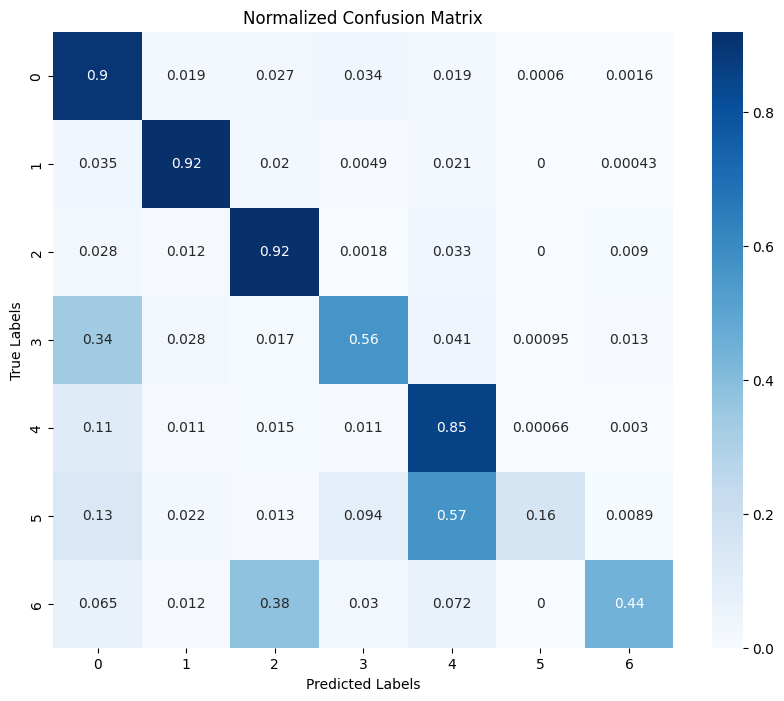

1109/1109 [==============================] - 24s 22ms/step
Emotion Correlation Heatmap
---------------------------
neutral	happiness	surprise	sadness	anger	disgust	fear
neutral	1.000	-0.514	-0.355	-0.060	-0.248	-0.044	-0.195
happiness	-0.514	1.000	-0.250	-0.271	-0.224	-0.147	-0.164
surprise	-0.355	-0.250	1.000	-0.184	-0.103	-0.077	0.221
sadness	-0.060	-0.271	-0.184	1.000	-0.098	0.064	-0.028
anger	-0.248	-0.224	-0.103	-0.098	1.000	0.254	-0.005
disgust	-0.044	-0.147	-0.077	0.064	0.254	1.000	0.023
fear	-0.195	-0.164	0.221	-0.028	-0.005	0.023	1.000


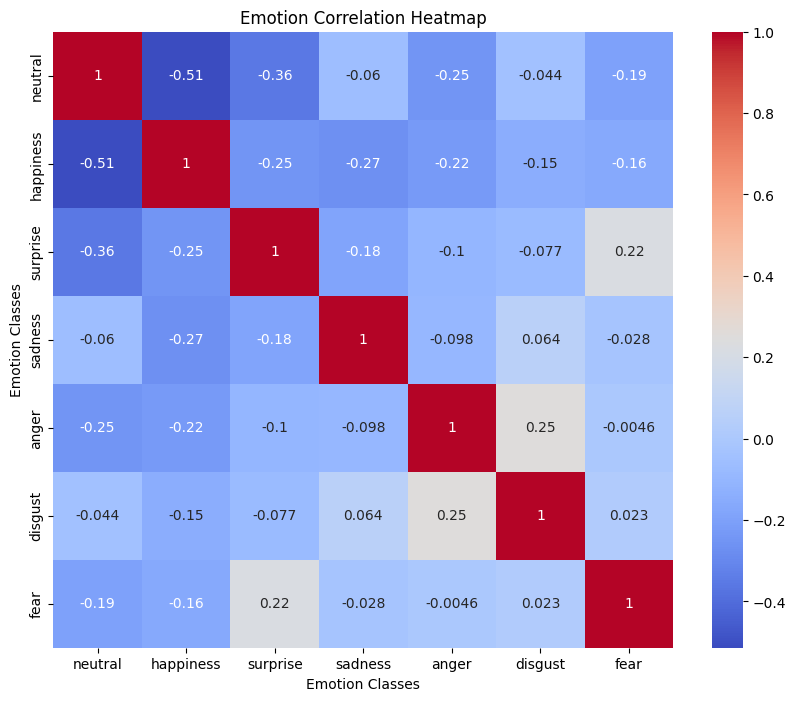

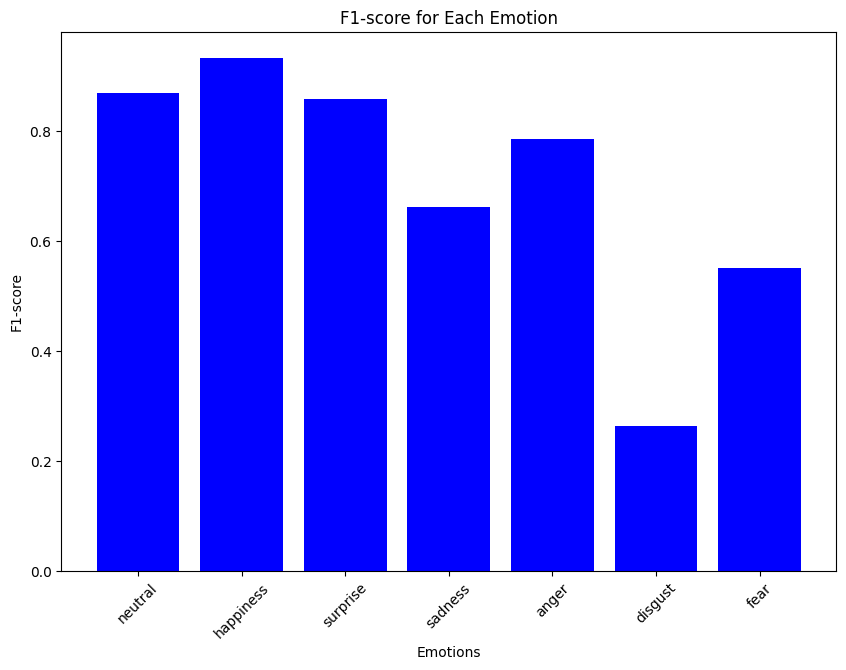

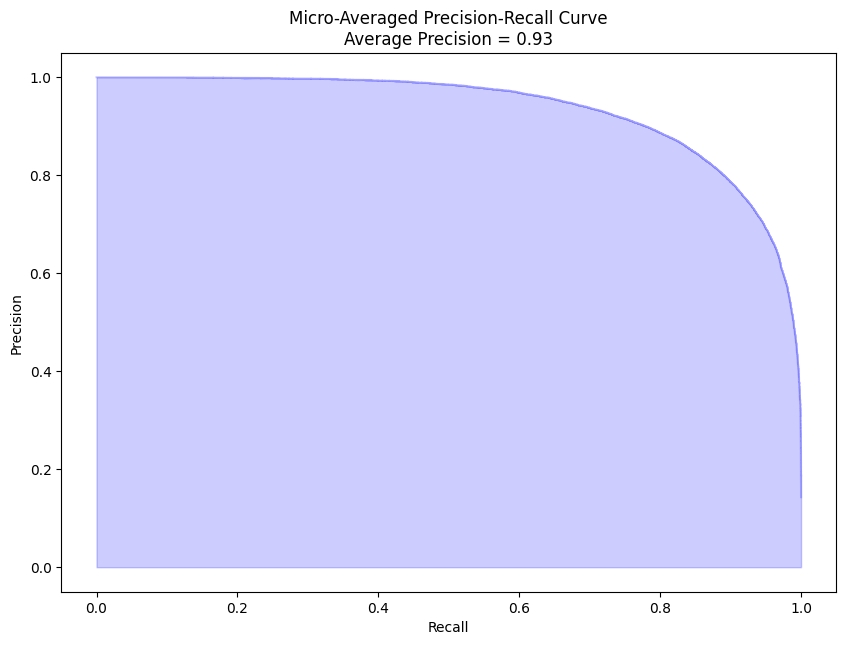

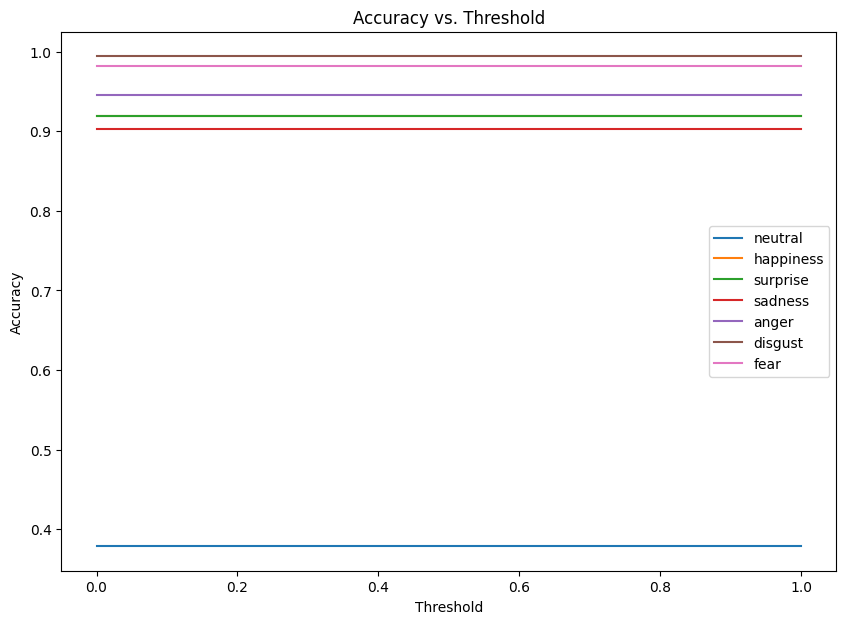

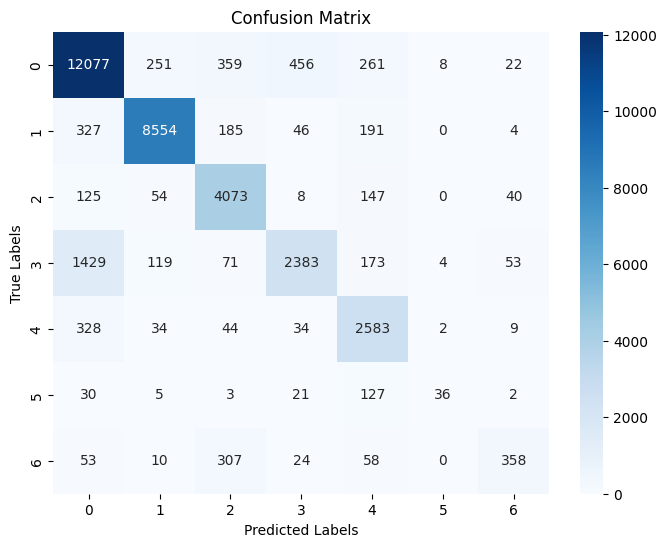

Threshold vs. Accuracy:
Threshold neutral: 0.38
Threshold happiness: 0.92
Threshold surprise: 0.92
Threshold sadness: 0.90
Threshold anger: 0.95
Threshold disgust: 0.99
Threshold fear: 0.98



In [16]:
def evaluate_model_performance():
    emotions = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']

    # Load and preprocess the test data
    x_test, y_test = load_and_preprocess_data()
    x_test, y_test = dtacleaning_andnormalization(x_test, y_test)

    # Load the trained model and weights
    model = loading_trained_model_and_weights()

    # Evaluate Model Performance
    y_true = np.argmax(y_test, axis=1)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
    print("Test Accuracy:", accuracy)

    # Calculate precision, recall, and F1-score for each class
    report = classification_report(y_true, y_pred_classes, target_names=emotions)
    print("Classification Report:\n", report)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:\n", conf_matrix)
    
    
    # Normalize the confusion matrix
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Heatmap for Normalized Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues")
    plt.title("Normalized Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    
    
    # Predict probabilities for each class
    y_pred_prob = model.predict(x_test)
    
    # Calculate correlation matrix
    correlation_matrix = np.corrcoef(y_pred_prob.T)
    
    
     # Display Emotion Correlation Heatmap as Text
    print("Emotion Correlation Heatmap")
    print("---------------------------")
    print("\t".join(emotions))
    for i, row in enumerate(correlation_matrix):
        row_text = emotions[i] + "\t"
        row_text += "\t".join([f"{value:.3f}" for value in row])
        print(row_text)
    
    # Create heatmap for correlation matrix
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=emotions, yticklabels=emotions)
    plt.title("Emotion Correlation Heatmap")
    plt.xlabel("Emotion Classes")
    plt.ylabel("Emotion Classes")
    plt.show()
    
   
    
    # Bar Plot for F1-score
    f1_scores = f1_score(y_true, y_pred_classes, average=None)
    plt.figure(figsize=(10, 7))
    plt.bar(emotions, f1_scores, color='b')
    plt.xlabel('Emotions')
    plt.ylabel('F1-score')
    plt.title('F1-score for Each Emotion')
    plt.xticks(rotation=45)
    plt.show()

    
    

    

    # Micro-averaged Precision-Recall Curve
    y_scores = y_pred.ravel()
    y_test_binary = np.zeros_like(y_pred)
    y_test_binary[np.arange(len(y_true)), y_true] = 1

    precision, recall, _ = precision_recall_curve(y_test_binary.ravel(), y_scores.ravel())
    average_precision = average_precision_score(y_test_binary.ravel(), y_scores.ravel())

    plt.figure(figsize=(10, 7))
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Micro-Averaged Precision-Recall Curve\nAverage Precision = {:.2f}'.format(average_precision))
    plt.show()
    # Accuracy vs. Threshold Plot
    thresholds = np.arange(0, 1.05, 0.05)
    accuracies = [np.sum((y_pred[:, i] >= thresholds[i]) == y_test_binary[:, i]) / len(y_test_binary) for i in range(len(emotions))]

    plt.figure(figsize=(10, 7))
    for i in range(len(emotions)):
        plt.plot(thresholds, [accuracies[i]] * len(thresholds), label=emotions[i])

    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Threshold')
    plt.legend()
    plt.show()
    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    
    # Threshold vs. Accuracy as Text
    thresholds = np.arange(0, 1.05, 0.05)
    threshold_accuracy_text = ""
    for i, emotion in enumerate(emotions):
        accuracy_at_threshold = np.sum((y_pred[:, i] >= thresholds[i]) == y_test_binary[:, i]) / len(y_test_binary)
        threshold_accuracy_text += f"Threshold {emotion}: {accuracy_at_threshold:.2f}\n"

    print("Threshold vs. Accuracy:")
    print(threshold_accuracy_text)
    
    
   


# Run the evaluation
evaluate_model_performance()

In [ ]:
`